In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,accuracy_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures,LabelEncoder
from sklearn.ensemble import VotingClassifier,BaggingClassifier,RandomForestClassifier,VotingRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv("sample.csv", encoding="ISO-8859-1")

In [82]:
try:
    df = pd.read_csv("sample.csv", encoding="ISO-8859-1")
    print("تم تحميل البيانات بنجاح.")
except Exception as e:
    print("حدث خطأ أثناء تحميل البيانات:", e)


تم تحميل البيانات بنجاح.


In [83]:
df.info()
print("\nعدد القيم الفارغة:")
print(df.isna().sum())

print("\nملخص إحصائي:")
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df.head

<bound method NDFrame.head of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       C

In [7]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [8]:
df.duplicated().sum()

0

In [9]:
df.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


catorigal data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [11]:
df_cat=df[['Ship Mode','Customer Name','Customer ID','Segment','Country','City','State','Region','Product ID' ,'Category','Sub-Category','Product Name']]

In [12]:
df_cat.head()

,Ship Mode,Customer Name,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
0,Second Class,Claire Gute,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,Second Class,Claire Gute,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,Second Class,Darrin Van Huff,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,Standard Class,Sean O'Donnell,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,Standard Class,Sean O'Donnell,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


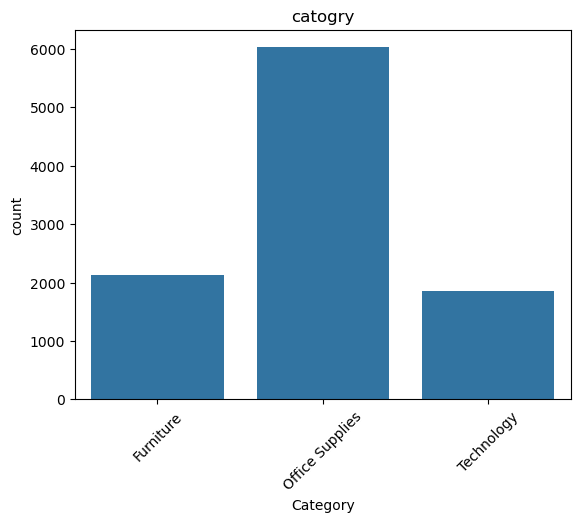

In [85]:
sns.countplot(data=df, x='Category')
plt.title("catogry")
plt.xticks(rotation=45)
plt.show()


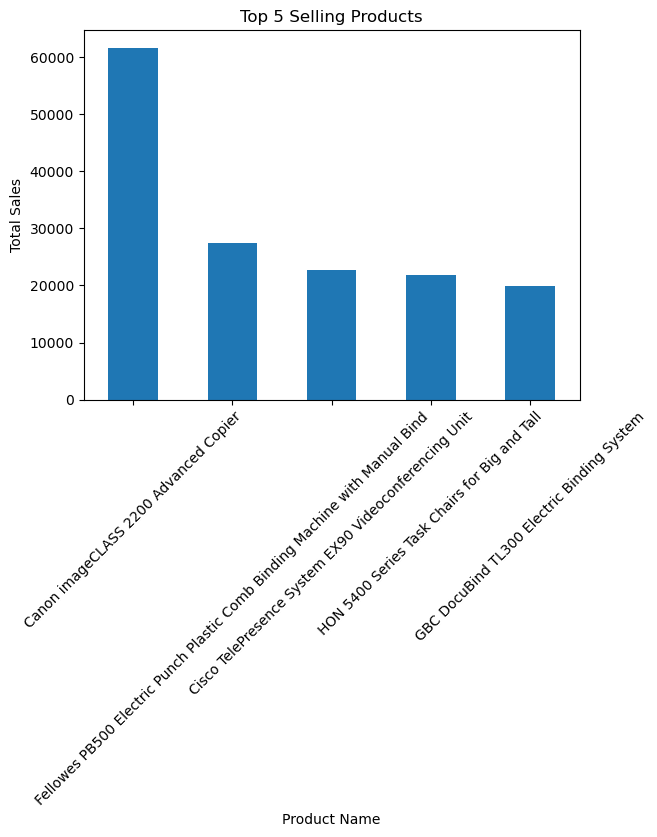

In [86]:
.## Top Selling and Profitable Products
product_group = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False)
top_5_selling = product_group.head(5)

top_5_selling.plot(kind="bar", title="Top 5 Selling Products", ylabel="Total Sales")
plt.xticks(rotation=45)
plt.show()


In [13]:
for feature in df_cat.columns:
    print(feature,':',df[feature].nunique())

Ship Mode : 4
Customer Name : 793
Customer ID : 793
Segment : 3
Country : 1
City : 531
State : 49
Region : 4
Product ID : 1862
Category : 3
Sub-Category : 17
Product Name : 1850


In [14]:
df['Order Date'].nunique()

1237

In [15]:
df['Ship Date'].nunique()

1334

In [16]:
##what are top selling producting

In [17]:
product_group =df.groupby(["Product Name"]).sum()['Sales']

In [18]:
product_group

Product Name
"While you Were Out" Message Book, One Form per Page                                                     25.228
#10 Gummed Flap White Envelopes, 100/Box                                                                 41.300
#10 Self-Seal White Envelopes                                                                           108.682
#10 White Business Envelopes,4 1/8 x 9 1/2                                                              488.904
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                 286.672
                                                                                                         ...   
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4     477.660
iOttie HLCRIO102 Car Mount                                                                              215.892
iOttie XL Car Mount                                                                        

In [19]:
top_selling_product=product_group.sort_values(ascending=False)

In [20]:
Top_5_5selling_producting=pd.DataFrame(top_selling_product[:5])

In [21]:
Top_5_5selling_producting

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479


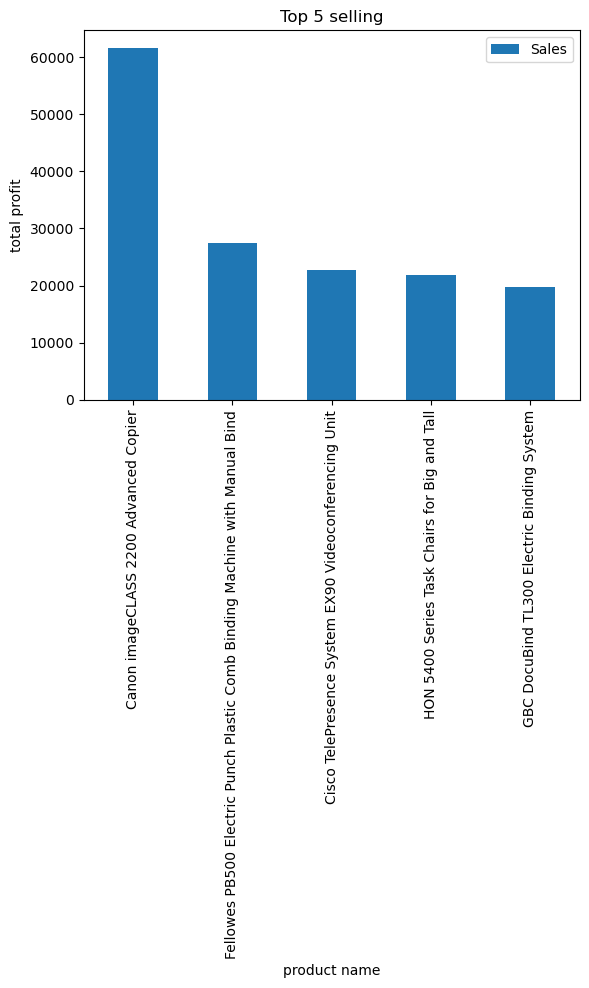

In [22]:
Top_5_5selling_producting.plot(kind="bar")
plt.title("Top 5 selling")
plt.xlabel("product name")
plt.ylabel("total profit")
plt.show()

In [23]:
## top profit product

In [24]:
product_group =df.groupby(["Product Name"]).sum()['Profit']

In [25]:
top_profit_product=product_group.sort_values(ascending=False)

In [26]:
Top_5_profit_producting=pd.DataFrame(top_profit_product[:5])

In [27]:
Top_5_profit_producting

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
Hewlett Packard LaserJet 3310 Copier,6983.8836
Canon PC1060 Personal Laser Copier,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766


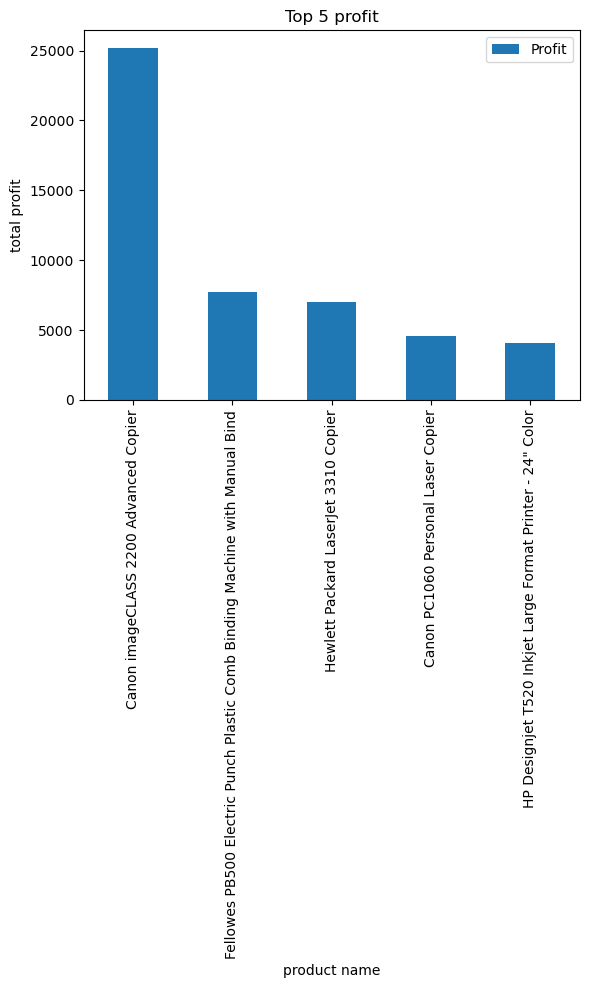

In [28]:
Top_5_profit_producting.plot(kind="bar")
plt.title("Top 5 profit")
plt.xlabel("product name")
plt.ylabel("total profit")
plt.show()

In [29]:
##compare 

In [30]:
Top_5_5selling_producting.index == Top_5_profit_producting.index

array([ True,  True, False, False, False])

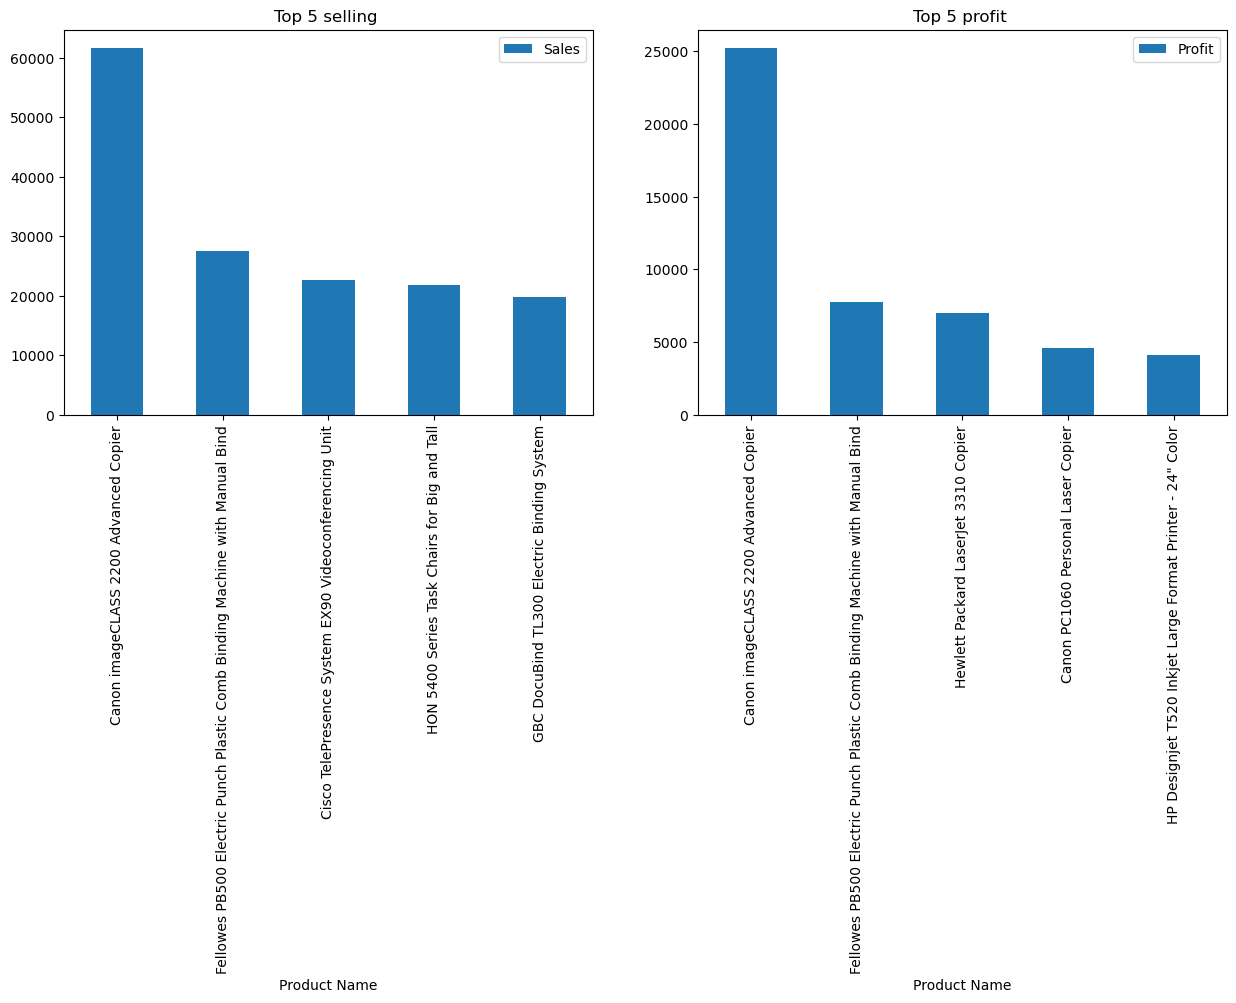

In [31]:
fig,(axis1,axis2)= plt.subplots(1,2,figsize=(15,5))
Top_5_5selling_producting.plot(kind="bar", y="Sales", ax=axis1)
axis1.set_title ("Top 5 selling ")
Top_5_profit_producting.plot(kind="bar", y='Profit', ax=axis2)
axis2.set_title ("Top 5 profit ")
plt.show()                               

In [32]:
print(Top_5_profit_producting.columns)


Index(['Profit'], dtype='object')


In [33]:
df .Region.value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

In [34]:
region_group = product.groupby("Region")[["Sales", "Profit"]].mean()
region_group.plot(kind="bar")
plt.show()


NameError: name 'product' is not defined

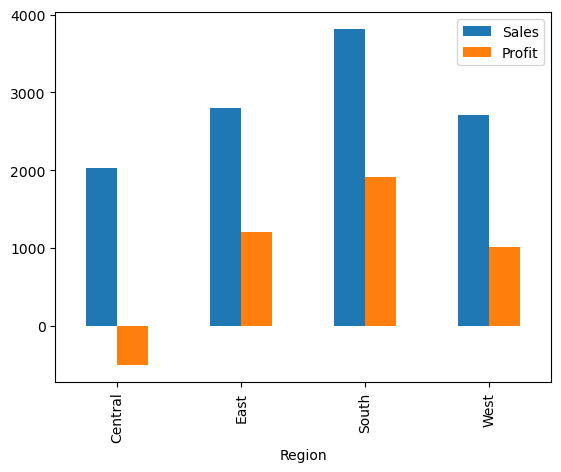

In [35]:
product= df[df["Product Name"]=="Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind"]
region_group = product.groupby("Region")[["Sales", "Profit"]].mean()
region_group.plot(kind="bar")
plt.show()

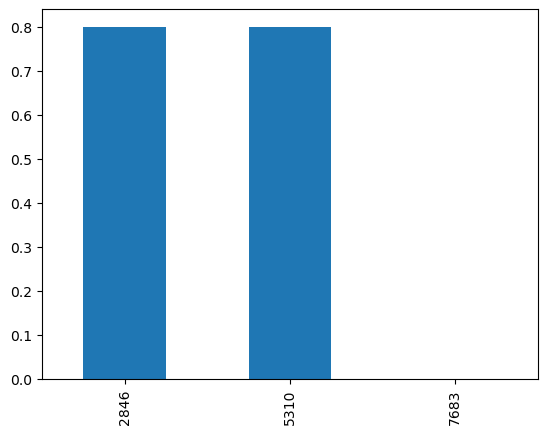

In [36]:
product = df[(df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind") & (df["Region"] == 'Central')]
product["Discount"].plot(kind="bar")
plt.show()


In [37]:
product = df[(df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind") & (df["Region"] == 'Central')]

In [38]:
##what is the sales trend over time

In [39]:
monthly_sales =df.groupby(['Order Date'],as_index=False).sum()


In [40]:
monthly_date

NameError: name 'monthly_date' is not defined

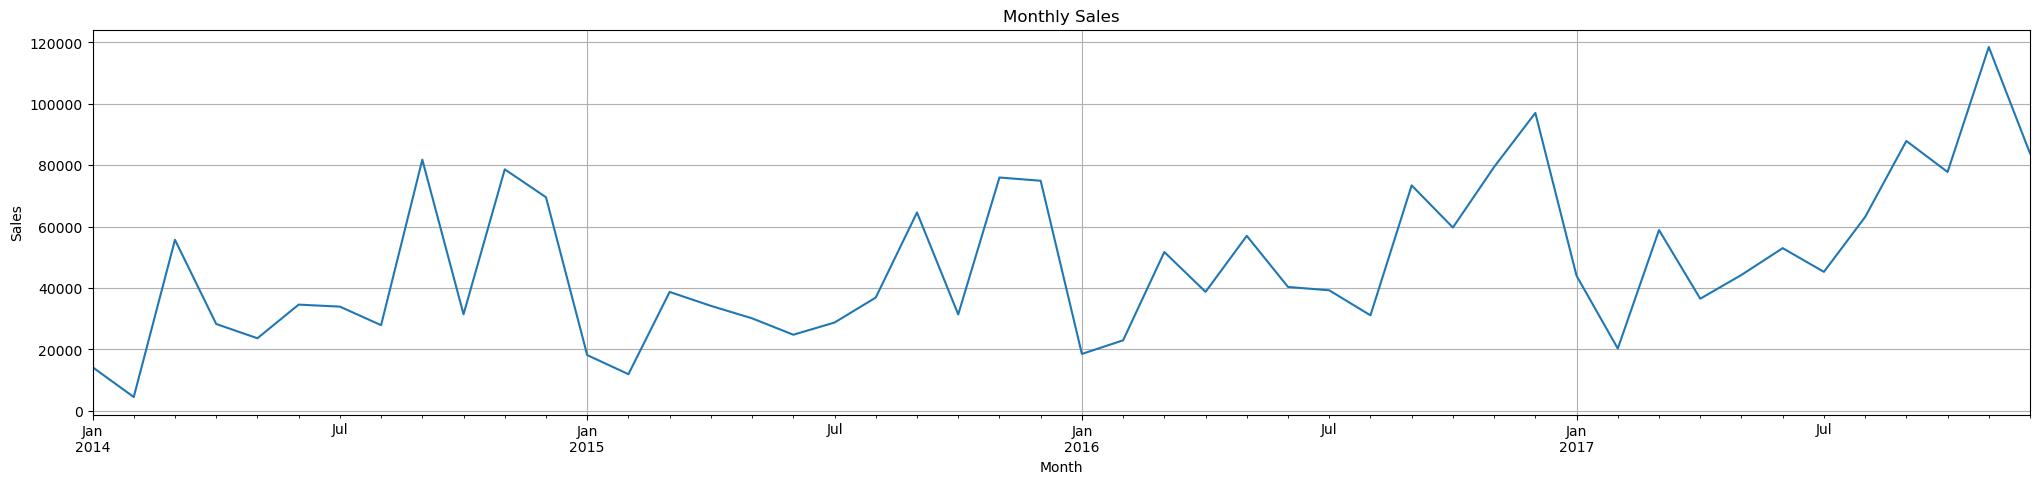

In [41]:
# أولاً: تأكد أن العمود الزمني في شكل datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# ثانياً: تعيين العمود الزمني كـ index
monthly_sales = df.set_index('Order Date')

# ثالثاً: إعادة التحجيم على أساس شهري
monthly_sales = monthly_sales.resample("ME").sum()  # استخدم "ME" بدلاً من "M" لتجنب التحذير

# رابعاً: الرسم البياني
plt.figure(figsize=(25,5))
monthly_sales['Sales'].plot(kind='line')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


C:\Users\Hossam ashraf\AppData\Local\Temp\ipykernel_760\3324208937.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales = monthly_sales.resample('Y').sum()


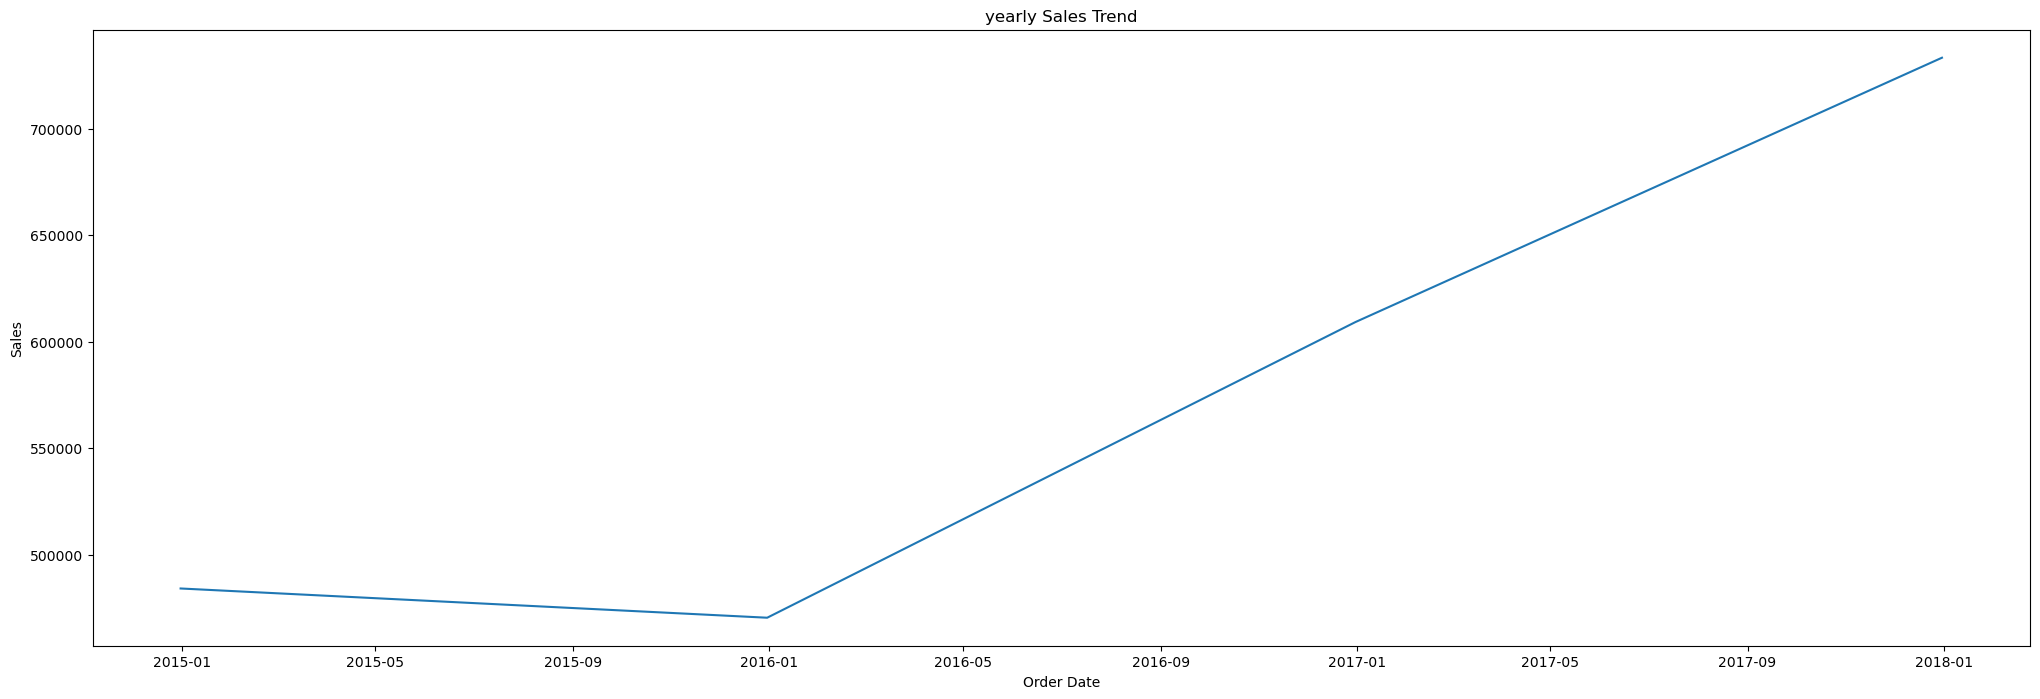

In [75]:
yearly_sales = monthly_sales.resample('Y').sum() 


plt.figure(figsize=(25,8))
plt.plot(yearly_sales['Sales'])
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.title("yearly Sales Trend")
plt.show()

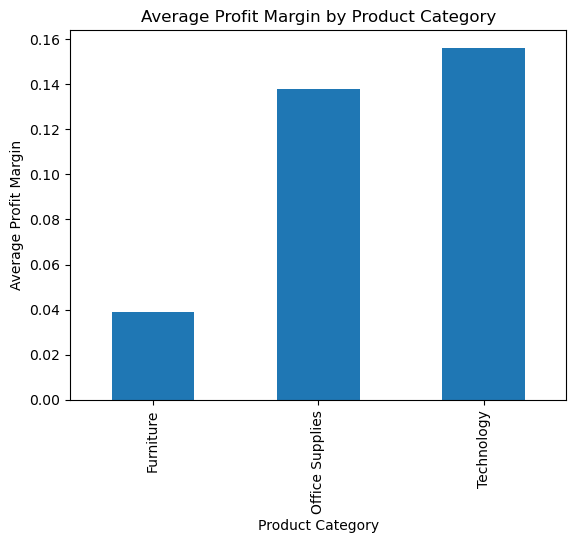

In [81]:
df['Profit Margin'] = df['Profit'] / df['Sales']

# Group the data by product category and calculate the average profit margin for each category
avg_profit_margin_by_category = df.groupby('Category')['Profit Margin'].mean()

# Plot the average profit margin for each category as a bar chart
avg_profit_margin_by_category.plot(kind='bar')

# Add a title and labels to the chart
plt.title("Average Profit Margin by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Profit Margin")

plt.show()

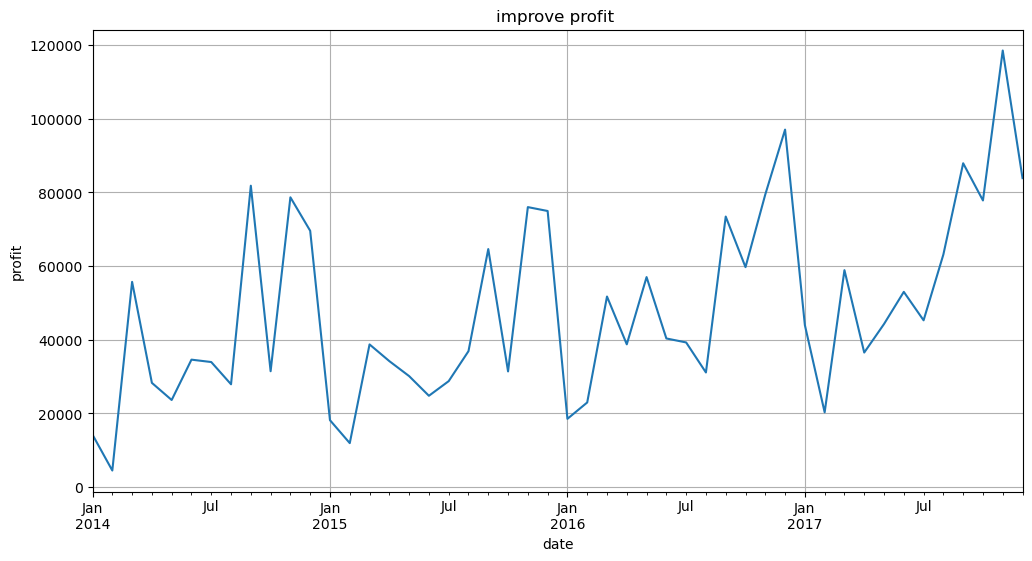

In [76]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# تجميع المبيعات شهريًا
sales_by_month = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
sales_by_month.index = sales_by_month.index.to_timestamp()

plt.figure(figsize=(12, 6))
sales_by_month.plot()
plt.title('improve profit ')
plt.xlabel('date')
plt.ylabel('profit')
plt.grid(True)
plt.show()


In [43]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [44]:
## Which region and place generate the most sales  

In [45]:
df_places =df[['Country', 'City', 'State','Region','Sales','Profit']]


In [46]:
df_places.head()

,Country,City,State,Region,Sales,Profit
0,United States,Henderson,Kentucky,South,261.9600,41.9136
1,United States,Henderson,Kentucky,South,731.9400,219.5820
2,United States,Los Angeles,California,West,14.6200,6.8714
3,United States,Fort Lauderdale,Florida,South,957.5775,-383.0310
4,United States,Fort Lauderdale,Florida,South,22.3680,2.5164


In [47]:
for place in df_places.columns:
    print(place, ':', df_places[place].nunique())


Country : 1
City : 531
State : 49
Region : 4
Sales : 5825
Profit : 7287


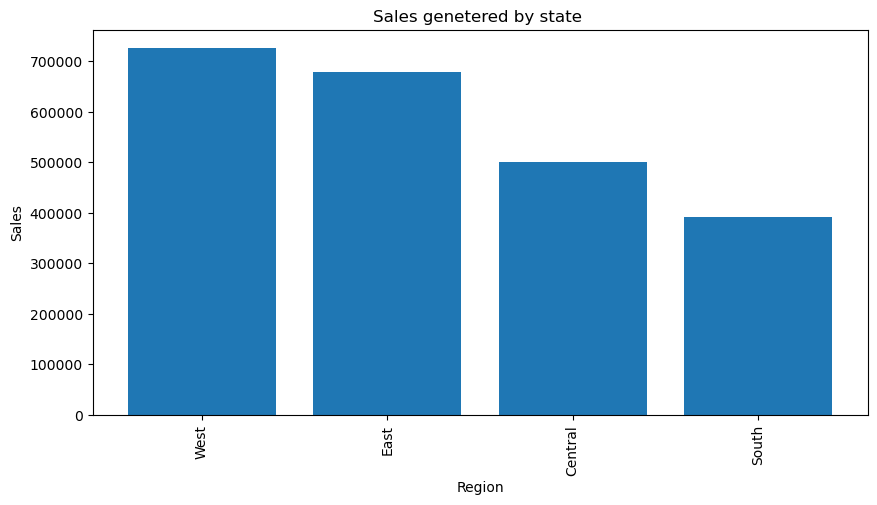

In [48]:
group_data =df_places.groupby(['Region'],as_index=False).sum()
group_data.sort_values(by='Sales', ascending=False, inplace=True)
# رابعاً: الرسم البياني
plt.figure(figsize=(10,5))
plt.bar(group_data['Region'], group_data['Sales'], align='center')

plt.xlabel('Region')
plt.ylabel('Sales')
plt.title("Sales genetered by state ")
plt.xticks(rotation =90)
plt.show()


In [49]:
print(df_places.columns)



Index(['Country', 'City', 'State', 'Region', 'Sales', 'Profit'], dtype='object')


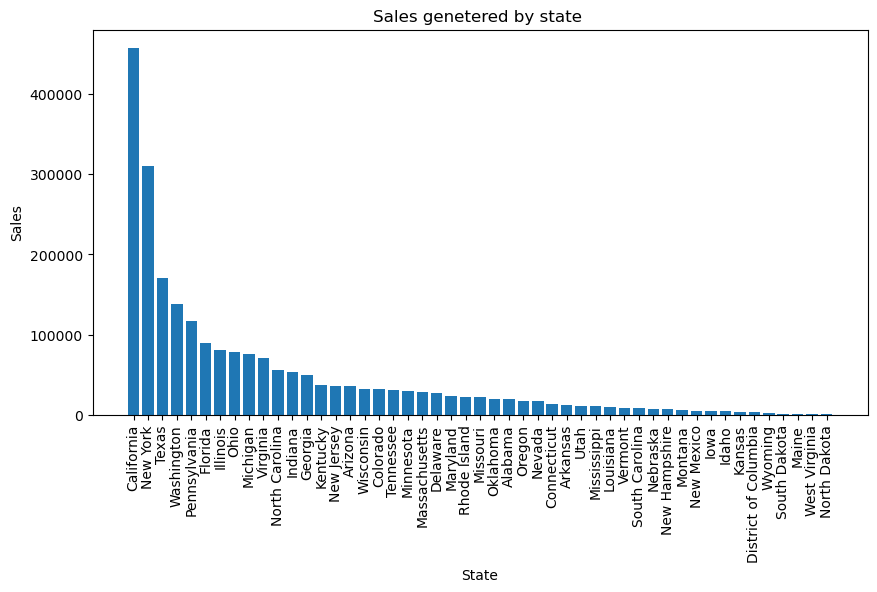

In [50]:
group_data =df_places.groupby(['State'],as_index=False).sum()
group_data.sort_values(by='Sales', ascending=False, inplace=True)
# رابعاً: الرسم البياني
plt.figure(figsize=(10,5))
plt.bar(group_data['State'], group_data['Sales'], align='center')

plt.xlabel('State')
plt.ylabel('Sales')
plt.title("Sales genetered by state ")
plt.xticks(rotation =90)
plt.show()


<Figure size 1500x600 with 0 Axes>

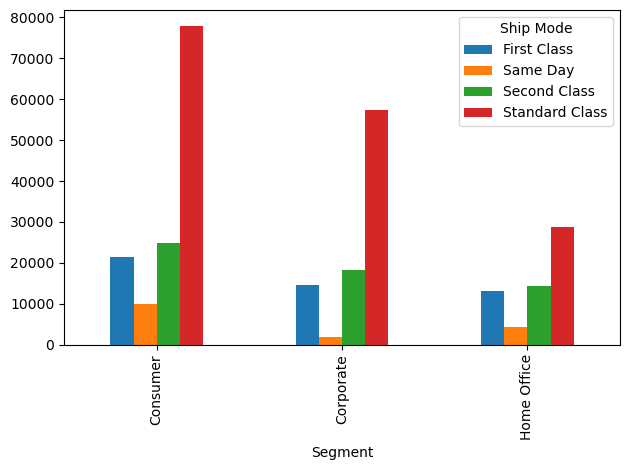

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))  # بدل 15 بأي عرض يناسبك
pivot_table.plot(kind='bar', stacked=False)
plt.tight_layout()
plt.show()



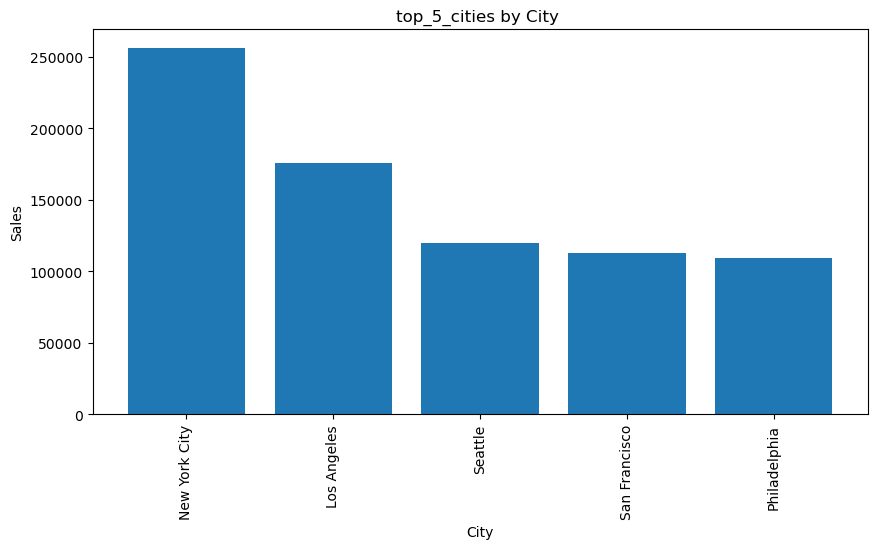

In [52]:
group_data =df_places.groupby(['City'],as_index=False).sum()
group_data.sort_values(by='Sales', ascending=False, inplace=True)
top_5_cities=group_data.head()
# رابعاً: الرسم البياني
plt.figure(figsize=(10,5))
plt.bar(top_5_cities['City'], top_5_cities['Sales'], align='center')

plt.xlabel('City')
plt.ylabel('Sales')
plt.title("top_5_cities by City ")
plt.xticks(rotation =90)
plt.show()

In [53]:
top_5_cities=group_data.head()

In [54]:
##what is the impact of discount on sales

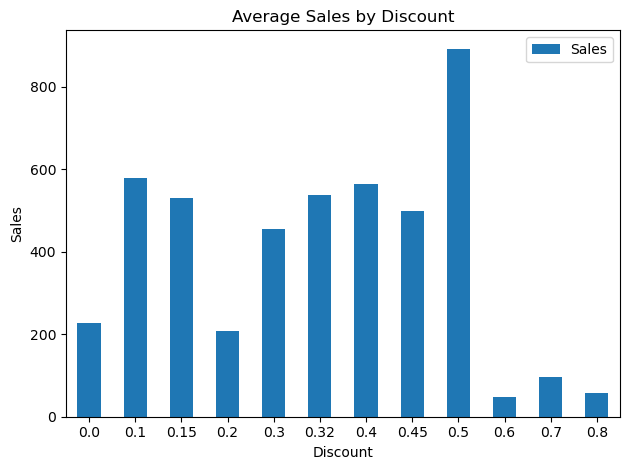

In [55]:
discount_group = df.groupby(["Discount"]).mean(numeric_only=True)[["Sales"]]
ax = discount_group.plot(kind="bar")
ax.set_ylabel("Sales")
plt.title("Average Sales by Discount")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [56]:
discount_group

,Sales
Discount,
0.00,226.742074
0.10,578.397351
0.15,529.971567
0.20,209.076940
0.30,454.742974
0.32,536.794770
0.40,565.134874
0.45,498.634000
0.50,892.705152


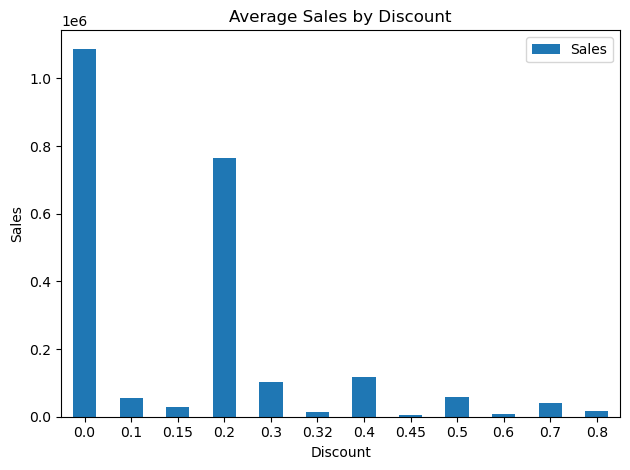

In [57]:
discount_group = df.groupby(["Discount"]).sum(numeric_only=True)[["Sales"]]
ax = discount_group.plot(kind="bar")
ax.set_ylabel("Sales")
plt.title("Average Sales by Discount")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


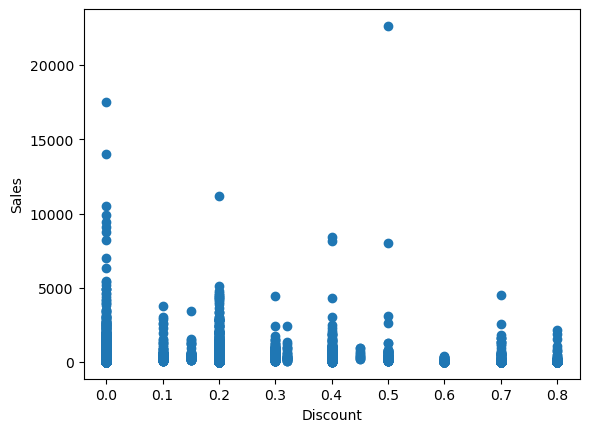

In [58]:
plt.scatter (df['Discount'],df['Sales'])
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

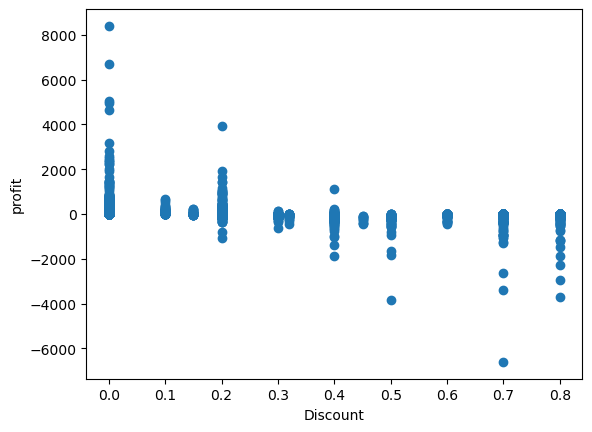

In [80]:
plt.scatter (df['Discount'],df['Profit'])
plt.xlabel('Discount')
plt.ylabel('profit')
plt.show()

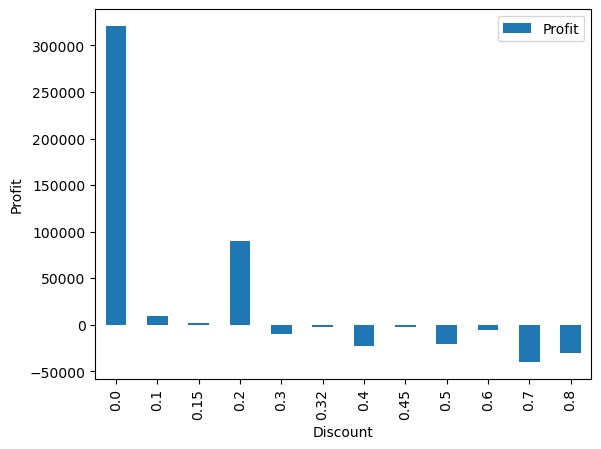

In [87]:
discount_group = df.groupby(["Discount"]).sum()[["Profit"]]

ax = discount_group.plot(kind="bar")

ax.set_ylabel("Profit")

plt.show()

In [60]:
## The best salles

In [61]:
avg_profit_margin_by_catagory=df.groupby('Category')['Profit'].mean()
print(avg_profit_margin_by_catagory)

Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64


In [62]:
##customers

In [63]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [64]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [65]:
pivot_table=pd.pivot_table(df, index='Segment', columns='Ship Mode', values='Sales', aggfunc='sum')


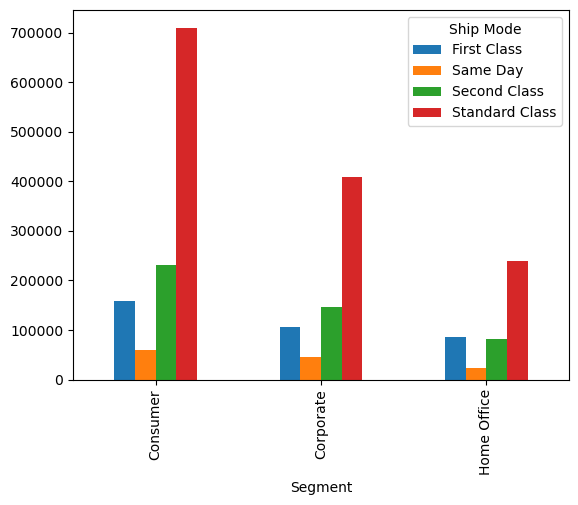

In [66]:
pivot_table.plot(kind='bar',stacked=False)
plt.show()

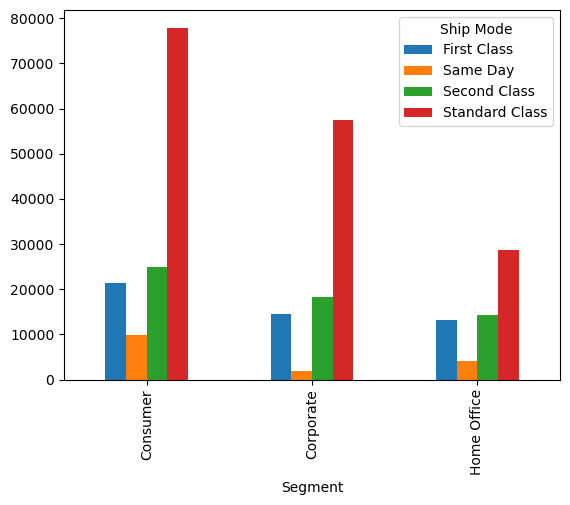

In [67]:
pivot_table=pd.pivot_table(df, index='Segment', columns='Ship Mode', values='Profit', aggfunc='sum')
pivot_table.plot(kind='bar',stacked=False)
plt.show()

In [68]:
pivot_table

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,21374.0436,9874.2054,24946.9112,77924.0490
Corporate,14464.4724,1818.1418,18225.7131,57470.8067
Home Office,13131.3239,4199.4117,14274.0111,28693.9318


Machine learning

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# تحميل البيانات من الملف
df = pd.read_csv("sample.csv", encoding='windows-1256')

# نسخة من البيانات
data = df.copy()


# حذف الأعمدة غير المفيدة
columns_to_drop = ['Row ID', 'Order ID', 'Customer ID', 'Product ID', 'Product Name', 'Order Date', 'Ship Date']
data.drop(columns=columns_to_drop, inplace=True)

# تشفير الأعمدة النصية
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # حفظ المحولات لو احتجتها لاحقًا

# تحديد المتغير الهدف
target_column = 'Profit'
X = data.drop(columns=[target_column])
y = data[target_column]

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تعريف نماذج التعلم الآلي
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'SVM': SVR()
}

# تدريب النماذج وتقييم الأداء
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
        # دقة تقريبية: كم نسبة التوقعات التي كان الخطأ فيها أقل من ±100
    accuracy = (abs(y_pred - y_test) < 100).mean()

    results[name] = {
        'MSE': mse,
        'R2': r2,
        'Approx_Accuracy(±100)': accuracy
    }


# عرض النتائج في جدول
results_df = pd.DataFrame(results).T
results_df.reset_index(inplace=True)
results_df.columns = ['Model', 'MSE', 'R2', 'Approx_Accuracy(±100)']

print(results_df)
 

               Model           MSE        R2  Approx_Accuracy(±100)
0  Linear Regression  82981.340568 -0.711480               0.859930
1      Decision Tree  60598.671432 -0.249840               0.942471
2      Random Forest  56423.865260 -0.163736               0.955978
3                KNN  52393.740993 -0.080615               0.903452
4                SVM  48515.580323 -0.000628               0.886943


In [70]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = np.mean(np.abs(y_pred - y_test) < 100)
print("XGBoost Regressor Performance:")
print(f" MSE: {mse:.2f}")
print(f" R2 Score: {r2:.4f}")
print(f" Approximate Accuracy (±100): {accuracy * 100:.2f}%")


📊 XGBoost Regressor Performance:
✅ MSE: 21093.65
✅ R2 Score: 0.5649
✅ Approximate Accuracy (±100): 95.95%


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# نماذج الانحدار المختلفة
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# تحميل البيانات
df = pd.read_csv('sample.csv', encoding='ISO-8859-1')

# معالجة التاريخ
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

# حذف الأعمدة الغير مفيدة
drop_cols = ['Row ID', 'Order ID', 'Customer ID', 'Customer Name',
             'Product ID', 'Product Name', 'Order Date', 'Ship Date']
df_model = df.drop(columns=drop_cols)

# تحويل النصوص لأرقام
for col in df_model.select_dtypes(include='object'):
    df_model[col] = LabelEncoder().fit_transform(df_model[col])

# فصل الميزات عن الهدف
X = df_model.drop('Profit', axis=1)
y = df_model['Profit']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# قائمة النماذج
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=100),
    'GradientBoosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

# تدريب وتقييم النماذج
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        'R2 Score': r2_score(y_test, preds),
        'RMSE': np.sqrt(mean_squared_error(y_test, preds))
    }

# عرض النتائج
print("نتائج النماذج:\n")
for name, metrics in results.items():
    print(f"{name}: R² = {metrics['R2 Score']:.3f}, RMSE = {metrics['RMSE']:.2f}")

نتائج النماذج:

LinearRegression: R² = -0.712, RMSE = 288.11
Ridge: R² = -0.712, RMSE = 288.12
Lasso: R² = -0.718, RMSE = 288.63
DecisionTree: R² = -0.491, RMSE = 268.90
RandomForest: R² = -0.136, RMSE = 234.74
GradientBoosting: R² = -0.025, RMSE = 222.89
SVR: R² = -0.001, RMSE = 220.26
KNN: R² = -0.063, RMSE = 227.00


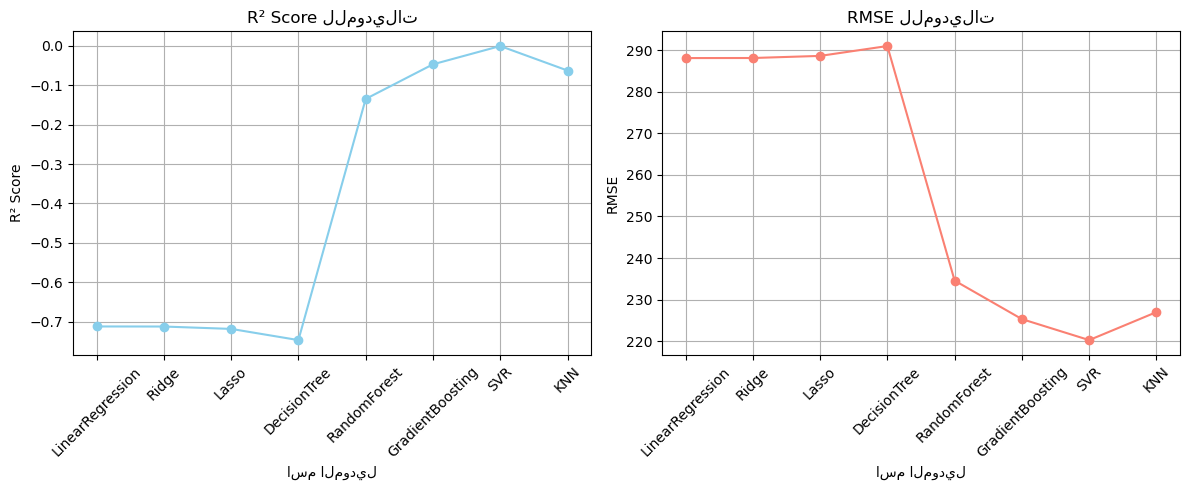

In [77]:
model_names = list(results.keys())
r2_scores = [results[m]['R2 Score'] for m in model_names]
rmses = [results[m]['RMSE'] for m in model_names]

plt.figure(figsize=(12, 5))

# منحنى R² Score
plt.subplot(1, 2, 1)
plt.plot(model_names, r2_scores, marker='o', linestyle='-', color='skyblue')
plt.title('R² Score للموديلات')
plt.xlabel('اسم الموديل')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.grid(True)

# منحنى RMSE
plt.subplot(1, 2, 2)
plt.plot(model_names, rmses, marker='o', linestyle='-', color='salmon')
plt.title('RMSE للموديلات')
plt.xlabel('اسم الموديل')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()
